In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'HCLTECH.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,22.712500,23.987499,22.625000,23.762501,13.993744,11239400
2002-08-13,24.250000,24.250000,23.150000,23.325001,13.736104,3756368
2002-08-14,23.237499,23.237499,22.768749,23.006250,13.548388,3964016
2002-08-15,23.006250,23.006250,23.006250,23.006250,13.548388,0
2002-08-16,23.625000,23.750000,23.250000,23.606251,13.901729,4848904
...,...,...,...,...,...,...
2024-06-21,1462.000000,1481.949951,1439.199951,1447.849976,1447.849976,6489262
2024-06-24,1437.849976,1443.949951,1426.599976,1440.849976,1440.849976,1988692
2024-06-25,1440.949951,1450.099976,1426.449951,1447.949951,1447.949951,2079037


In [11]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(8, return_sequences=False))
model.add(Dense(4))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=50)

[array([0.00532444, 0.0050627 , 0.00487201, 0.00487201, 0.00523096,
       0.00569461, 0.00675276, 0.00620312, 0.00584417, 0.00593017,
       0.00616947, 0.00532818, 0.00579182, 0.00615825, 0.00632651,
       0.00737345, 0.00704441, 0.00690981, 0.00680511, 0.00632277])]
[0.006973369653631743]

[array([0.00532444, 0.0050627 , 0.00487201, 0.00487201, 0.00523096,
       0.00569461, 0.00675276, 0.00620312, 0.00584417, 0.00593017,
       0.00616947, 0.00532818, 0.00579182, 0.00615825, 0.00632651,
       0.00737345, 0.00704441, 0.00690981, 0.00680511, 0.00632277]), array([0.0050627 , 0.00487201, 0.00487201, 0.00523096, 0.00569461,
       0.00675276, 0.00620312, 0.00584417, 0.00593017, 0.00616947,
       0.00532818, 0.00579182, 0.00615825, 0.00632651, 0.00737345,
       0.00704441, 0.00690981, 0.00680511, 0.00632277, 0.00697337])]
[0.006973369653631743, 0.006973369653631743]

Epoch 1/50
515/515 [==============================] - 17s 20ms/step - loss: 0.0034
Epoch 2/50
515/515 [===============

In [12]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

161/161 [==============================] - 7s 9ms/step


0.9994096293878908

In [13]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 7ms/step


0.9768914381501793

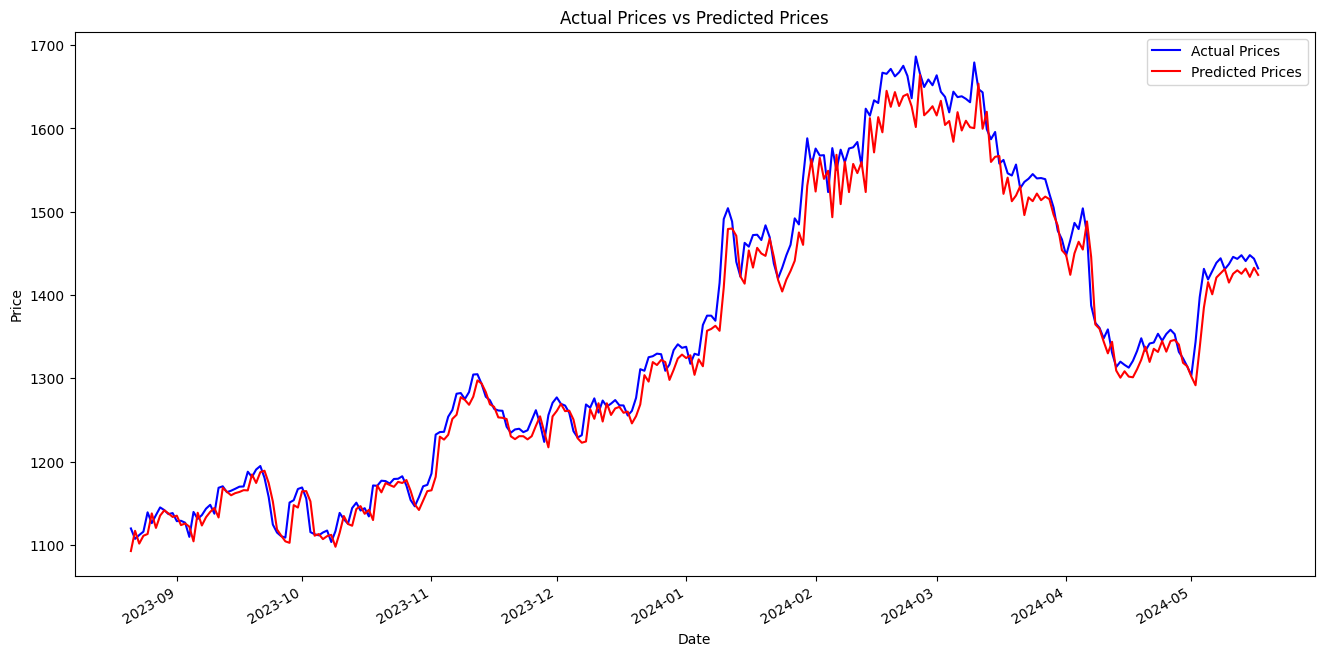

In [14]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [15]:
import joblib


model_file_path = '13.joblib'
scaler_file_path = 'scaler13.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 13.joblib
Scaler saved to scaler13.joblib
